In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
import yfinance as yf

## Download Apple Stock Data

*Download the historical stock data for AAPL from 2000 to the present.*

In [9]:
# Download data
def download_data(ticker, start_date, end_date):
    df = yf.download(ticker, start=start_date, end=end_date)
    return df[['Close']]  # Extract the "Close" prices

# Parameters
ticker = "AAPL"
start_date = "2000-01-01"
end_date = "2023-12-31"

# Get the data
df = download_data(ticker, start_date, end_date)
print(df.head())
print(df.shape)


[*********************100%***********************]  1 of 1 completed

Price          Close
Ticker          AAPL
Date                
2000-01-03  0.999442
2000-01-04  0.915179
2000-01-05  0.928571
2000-01-06  0.848214
2000-01-07  0.888393
(6037, 1)


In [10]:
6037//365 ##ok

16

##  Divide Data into Different Timeframes

*For example, we can divide the data into yearly intervals or custom time periods.*

In [11]:
def split_data_by_timeframe(df, freq='Y'):
    # Split data into different timeframes
    df['Year'] = df.index.year
    grouped = df.resample(freq).mean()  # Group by frequency (e.g., 'Y' for yearly)
    return [df.loc[df.index.year == year] for year in df['Year'].unique()]

# Example: Split data yearly
timeframes = split_data_by_timeframe(df)

/var/folders/jp/fnr369_172b9ghtllhyqdmtw0000gp/T/ipykernel_99883/2675922122.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample(freq).mean()  # Group by frequency (e.g., 'Y' for yearly)


## Create Spectrograms for Each Timeframe

*Generate spectrograms for each timeframe and display them.*

/var/folders/jp/fnr369_172b9ghtllhyqdmtw0000gp/T/ipykernel_99883/1531166305.py:9: UserWarning: nperseg = 64 is greater than input length  = 1, using nperseg = 1
  f, t, Sxx = spectrogram(normalized_data, fs=1, nperseg=64)
/var/folders/jp/fnr369_172b9ghtllhyqdmtw0000gp/T/ipykernel_99883/1531166305.py:13: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud', cmap='jet')


TypeError: Dimensions of C (252, 1, 1) are incompatible with X (1) and/or Y (1); see help(pcolormesh)

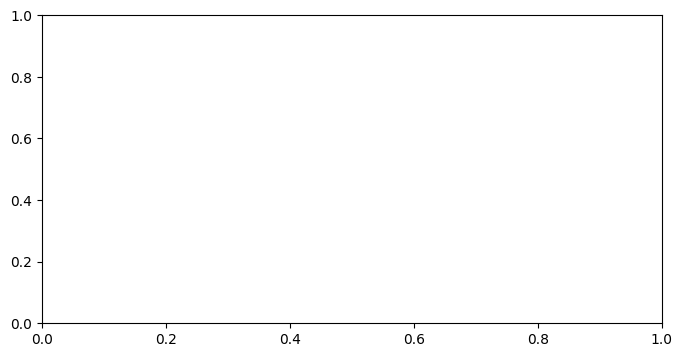

In [12]:
def generate_spectrogram(data, title, filename=None):
    # Ensure data is a numpy array
    data = data['Close'].dropna().to_numpy()

    # Normalize data
    normalized_data = (data - data.min()) / (data.max() - data.min())
    
    # Generate spectrogram
    f, t, Sxx = spectrogram(normalized_data, fs=1, nperseg=64)
    
    # Plot spectrogram
    plt.figure(figsize=(8, 4))
    plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud', cmap='jet')
    plt.colorbar(label='Intensity (dB)')
    plt.title(f'Spectrogram - {title}')
    plt.xlabel('Time')
    plt.ylabel('Frequency')

    # Save if filename is provided
    if filename:
        plt.savefig(filename)
    plt.show()

# Generate spectrograms for each timeframe
for idx, timeframe in enumerate(timeframes):
    if not timeframe.empty:
        year = timeframe.index.year[0]  # Extract year
        generate_spectrogram(timeframe, f"Year {year}", filename=f"spectrogram_{year}.png")

## Plot Side-by-Side for Comparison

*To create a figure similar to the example image, plot the raw data and the spectrogram together for each timeframe.*

/var/folders/jp/fnr369_172b9ghtllhyqdmtw0000gp/T/ipykernel_99883/3481224508.py:9: UserWarning: nperseg = 64 is greater than input length  = 1, using nperseg = 1
  f, t, Sxx = spectrogram(normalized_data, fs=1, nperseg=64)
/var/folders/jp/fnr369_172b9ghtllhyqdmtw0000gp/T/ipykernel_99883/3481224508.py:21: RuntimeWarning: divide by zero encountered in log10
  im = axs[1].pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud', cmap='jet')


TypeError: Dimensions of C (252, 1, 1) are incompatible with X (1) and/or Y (1); see help(pcolormesh)

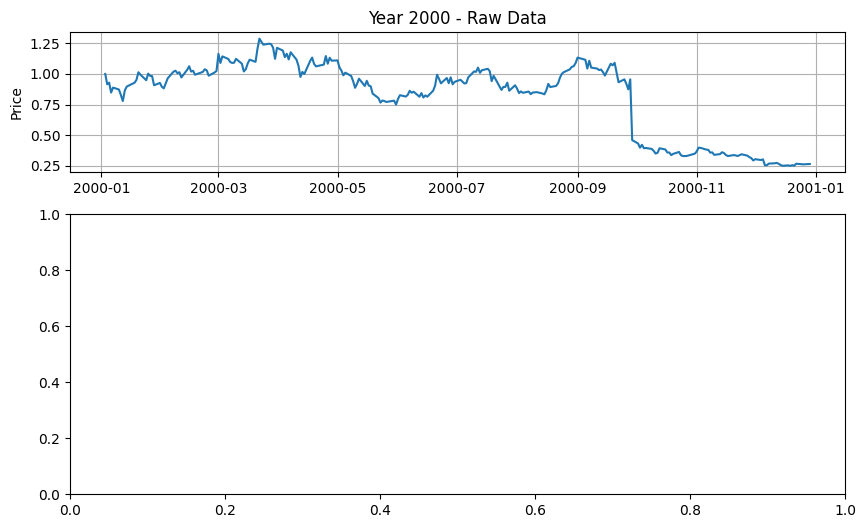

In [13]:
def plot_timeframe_and_spectrogram(df, title):
    # Ensure data is a numpy array
    data = df['Close'].dropna().to_numpy()

    # Normalize data
    normalized_data = (data - data.min()) / (data.max() - data.min())

    # Generate spectrogram
    f, t, Sxx = spectrogram(normalized_data, fs=1, nperseg=64)

    # Create subplots
    fig, axs = plt.subplots(2, 1, figsize=(10, 6), gridspec_kw={'height_ratios': [1, 2]})

    # Plot raw data
    axs[0].plot(df.index, df['Close'], label='Raw Data')
    axs[0].set_title(f"{title} - Raw Data")
    axs[0].set_ylabel('Price')
    axs[0].grid()

    # Plot spectrogram
    im = axs[1].pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud', cmap='jet')
    fig.colorbar(im, ax=axs[1], label='Intensity (dB)')
    axs[1].set_title(f"{title} - Spectrogram")
    axs[1].set_xlabel('Time')
    axs[1].set_ylabel('Frequency')

    # Show the plot
    plt.tight_layout()
    plt.show()

# Plot for each timeframe
for idx, timeframe in enumerate(timeframes):
    if not timeframe.empty:
        year = timeframe.index.year[0]  # Extract year
        plot_timeframe_and_spectrogram(timeframe, f"Year {year}")

[*********************100%***********************]  1 of 1 completed
/var/folders/jp/fnr369_172b9ghtllhyqdmtw0000gp/T/ipykernel_99883/2675922122.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample(freq).mean()  # Group by frequency (e.g., 'Y' for yearly)
/var/folders/jp/fnr369_172b9ghtllhyqdmtw0000gp/T/ipykernel_99883/3481224508.py:9: UserWarning: nperseg = 64 is greater than input length  = 1, using nperseg = 1
  f, t, Sxx = spectrogram(normalized_data, fs=1, nperseg=64)
/var/folders/jp/fnr369_172b9ghtllhyqdmtw0000gp/T/ipykernel_99883/3481224508.py:21: RuntimeWarning: divide by zero encountered in log10
  im = axs[1].pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud', cmap='jet')


TypeError: Dimensions of C (252, 1, 1) are incompatible with X (1) and/or Y (1); see help(pcolormesh)

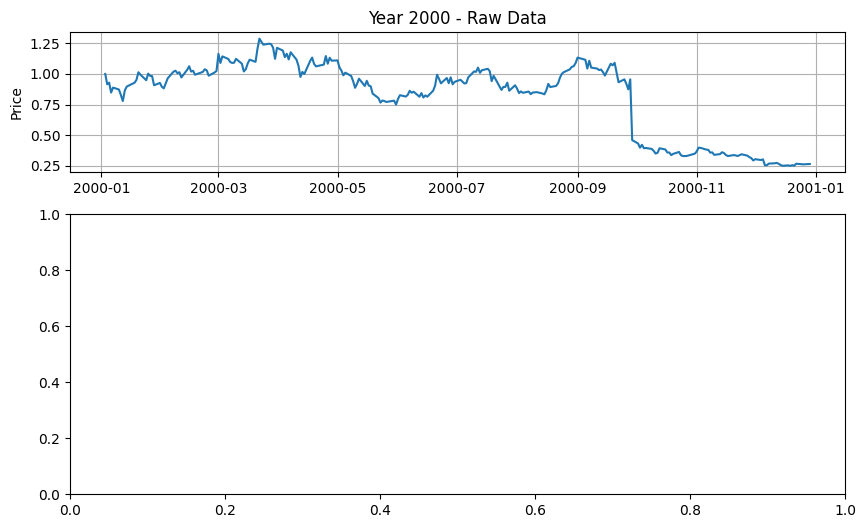

In [14]:

# Main execution
ticker = "AAPL"
start_date = "2000-01-01"
end_date = "2023-12-31"

df = download_data(ticker, start_date, end_date)
timeframes = split_data_by_timeframe(df)
for idx, timeframe in enumerate(timeframes):
    if not timeframe.empty:
        year = timeframe.index.year[0]
        plot_timeframe_and_spectrogram(timeframe, f"Year {year}")